In [ ]:
import pandas as pd

df = pd.read_csv("/content/Indian_Domestic_Airline.csv")
df.dropna(subset=["Review"], inplace=True)  # remove missing reviews
print(df.columns)

Index(['AirLine_Name', 'Rating - 10', 'Title', 'Name', 'Date', 'Review',
       'Recommond'],
      dtype='object')


In [ ]:
from textblob import TextBlob

df["Sentiment_Score"] = df["Review"].apply(lambda x: TextBlob(x).sentiment.polarity)

def classify(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment_Label"] = df["Sentiment_Score"].apply(classify)


/tmp/ipython-input-7-2220107153.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sentiment_Label", palette="coolwarm")


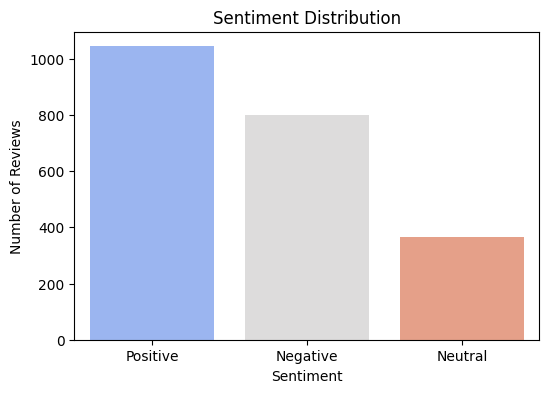

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Sentiment_Label", palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


Index(['AirLine_Name', 'Rating - 10', 'Title', 'Name', 'Date', 'Review',
       'Recommond', 'Sentiment_Score', 'Sentiment_Label'],
      dtype='object')


/tmp/ipython-input-8-3585276240.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=airline_ratings.values, y=airline_ratings.index, palette="coolwarm")


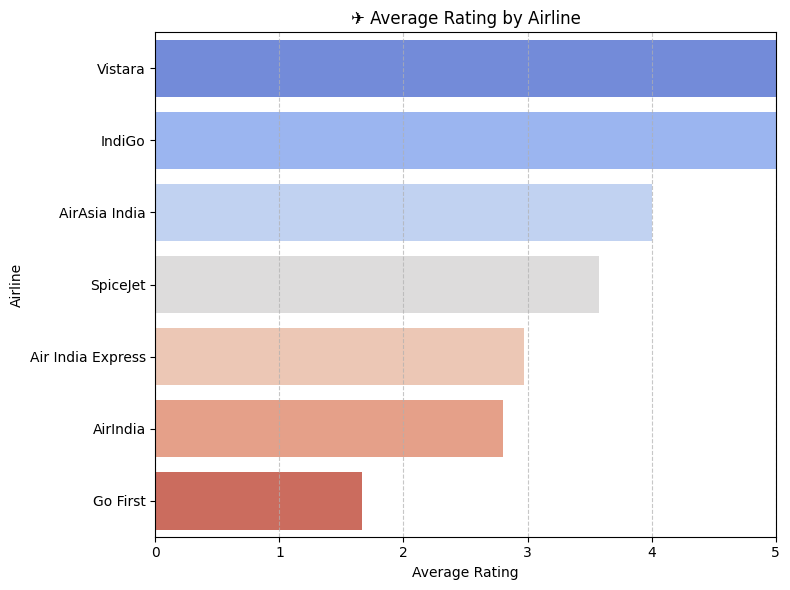

In [ ]:
print(df.columns)
df = df.dropna(subset=["AirLine_Name", "Rating - 10"])
airline_ratings = df.groupby("AirLine_Name")["Rating - 10"].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=airline_ratings.values, y=airline_ratings.index, palette="coolwarm")
plt.xlabel("Average Rating")
plt.ylabel("Airline")
plt.title("✈️ Average Rating by Airline")
plt.xlim(0, 5)  # Assuming rating is out of 5
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


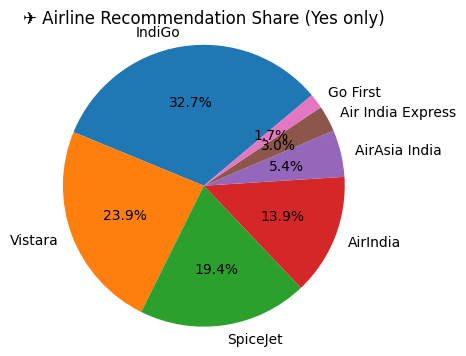

In [ ]:
recommended = df[df["Recommond"].str.strip().str.lower() == "yes"]

# Count how many times each airline was recommended
recommend_counts = recommended["AirLine_Name"].value_counts()

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(recommend_counts, labels=recommend_counts.index, autopct='%1.1f%%', startangle=40)
plt.title("✈️ Airline Recommendation Share (Yes only)")
plt.axis("equal")  # Keep it a circle
plt.show()

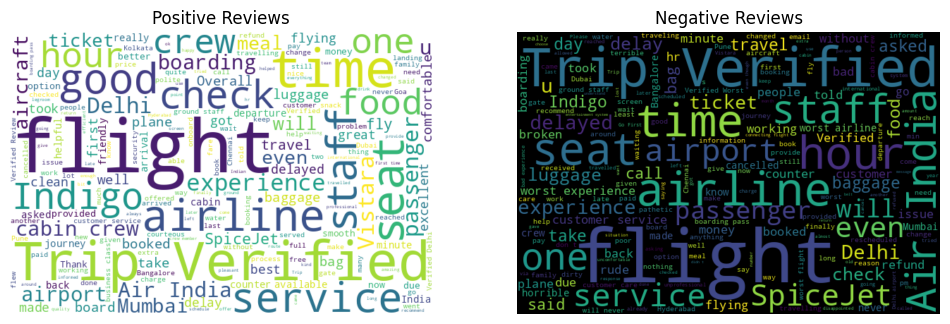

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_reviews = " ".join(df[df["Sentiment_Label"]=="Positive"]["Review"])
negative_reviews = " ".join(df[df["Sentiment_Label"]=="Negative"]["Review"])

wordcloud_pos = WordCloud(width=600, height=400, background_color='white').generate(positive_reviews)
wordcloud_neg = WordCloud(width=600, height=400, background_color='black').generate(negative_reviews)

# Plot both
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Reviews")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Reviews")

plt.show()
